{'glasgow': 14, 'good': 5, 'great': 4, 'time': 4, 'logic': 3, 'juicy': 3, 'today': 3, 'whale': 3, 'lego': 3, 'hustle': 2}


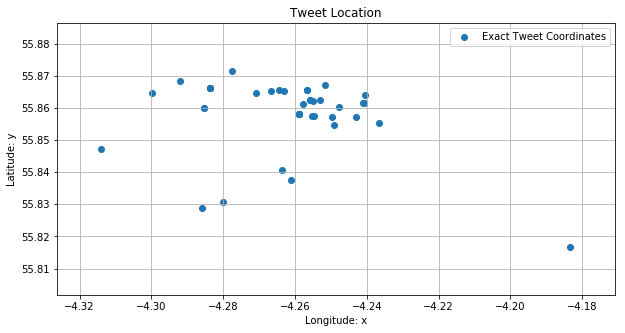

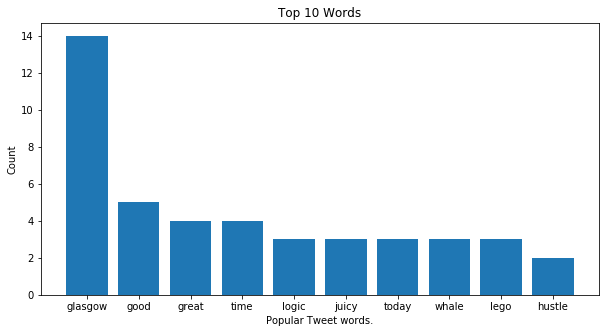

In [4]:
# For a better understanding, uncomment the print() function along the code and see the results.

import pandas as  pd
import csv
import operator
import numpy as np
%matplotlib notebook
%matplotlib inline
import re
import json
import matplotlib as mpl   
import matplotlib.pyplot as plt
from __future__ import print_function, division
import nltk
#To install nltk corpus for stop words, un-comment and run the next line.
#nltk.download()
from nltk.corpus import stopwords


N = 10 
final_set, a, b = [], [], []
ab = np.empty((43,2))

with open('geocoordinatedata.csv', 'rt', encoding='utf8') as csvfile:
    csv.reader(csvfile, delimiter=' ', quotechar='|')
    sort = sorted(csvfile, key=operator.itemgetter(0))
    
#Reading each line of the file, working on coordinates and creating a "final_set" list that we we will use later
#for processing words.
    for eachline in sort:
        coordinates = eachline.split('":{"type":"Point","coordinates":')[1].split('},"source')[0]
        filtered_tweets = list(filter(bool, re.split('[^a-z]', json.loads(eachline)["text"].lower())))
        final_set.append(filtered_tweets)
        x = (coordinates.split('[')[1].split(',')[0])
        y = (coordinates.split(',')[1].split(']')[0])
        x_float, y_float = float(x), float(y)
        a.append(x_float)
        b.append(y_float)
        a_array, b_array = np.asarray(a), np.asarray(b)
    final = np.stack((a_array, b_array), axis=1)
    #print(final)    

    #In this part we use the "final_set" to process our tweets' data.
    final_set_string = ''.join(str(e) for e in final_set)
    wordList = re.sub("[^\w]", " ",  final_set_string).split()
    #print(wordList)
    #We remove stop words and 'https' which is appearing too often in tweets.
    filteredText = [word for word in wordList if word not in stopwords.words('english') if len(word)>3 if word!='https']      
    #print(filteredText)
    #Creating a dictionary "wordDict" where each word has a key value according to how many times this word appears in the tweets
    results_union = set().union(*final_set)
    wordDict = dict.fromkeys(results_union, 0)
    for word in filteredText:
        wordDict[word] += 1 
    #print(wordDict)
    #We sort the dictionary and choose the top N=10 words with respect to the key value.    
    topwords = dict(sorted(wordDict.items(), key=operator.itemgetter(1), reverse=True)[:(N-len(wordDict))])
    print(topwords)
    #Creating a DataFrame to show the top N=10 words.
    df = pd.DataFrame({'Words':[*topwords]}) 
    #print(df)
    
    #Making the Plot for Tweet Coordinates.
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(final[:,0], final[:,1], label='Exact Tweet Coordinates')
    ax.set_xlabel("Longitude: x")
    ax.set_ylabel("Latitude: y")
    ax.set_title("Tweet Location")
    ax.legend()
    ax.grid("on")
    
    #Making the Plot for top N words of our tweet corpus.
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1, 1, 1)
    plt.bar(range(len(topwords)), topwords.values(), align="center")
    plt.xticks(range(len(topwords)), list(topwords.keys()))
    ax.set_xlabel("Popular Tweet words.")
    ax.set_ylabel("Count")
    ax.set_title("Top 10 Words")
    
    